In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

<h1 style="background-color: #FFFF00">Only Marked Parts need to be changed</h1>

# Experiment-Definition

For every attack, we define a set of attack arguments (e.g. epsilon for FGSME) 

| Attack          |Parameter   |         |           |       |      |      |      |      |      |      |      |
|-----------------|------------|---------|-----------|-------|------|------|------|------|------|------|------|
| FGSME           |$\epsilon$  | 0       | 0.0001    | 0.0002|0.0005| 0.01 | 0.02 | 0.05 |  0.1 |  0.2 |  0.5 | 
| FGA (L2)        |$\epsilon$  | 0       |  1        |  2    |  5   |  10  |  20  |  50  |  75  | 100  | 150  | 
| FGA (L1)        |$\epsilon$  | 0       |  100      |  200  |  500 | 1000 | 2000 | 5000 | 1e4  | 2e4  |  5e4 | 
| Volume Atk      |$\epsilon$  | 0       |  10       |  20   |  30  | 40   | 50   | 60   | 70   | 80   |  90  | 
|Interpolation Atk| tbd | 
| Time Stretch Atk|`num_iter`  | 1       | 2         | 3     | 4    |
| Pitch Atk       |`num_iter`  | 1       | 2         | 3     | 4    |

The experiment setup for these values is defined below.

As a first *robustness-criteria* we sum the success rates for each model for all attack configurations.

In [2]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from attacks.FGA_Batch import fast_gradient_attack
from attacks.pgd import ProjectedGradientDescent
from attacks.speed import TimeStretchAttack
from attacks.volume import VolumeAttack
from attacks.pitch import PitchAttack

from classification.models.M5 import M5PLModule

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.0001, 0.0002, 0.0005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["2"], "epsilon": [0, 1, 2, 5, 10, 20, 50, 75, 100, 150]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L2"}
            },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["1"], "epsilon": [0, 100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L1"}
            },
            {
              "attack_fn": VolumeAttack, 
              "attack_arg": {"epsilon": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"Volume"}
             },

            {
              "attack_fn": PitchAttack, 
              "attack_arg": {"num_iter": [1, 2, 3, 4]},
              "meta": {"key_result":"success_rate", "key_config":"num_iter", "title":"Pitch Attack"}
             },
    
            {
              "attack_fn": TimeStretchAttack, 
              "attack_arg": {"num_iter": [1, 2, 3, 4]},
              "meta": {"key_result":"success_rate", "key_config":"num_iter", "title":"Time Stretch Attack"}
             }
]
##############################################################################################################
##########experiment = RobustnessExperiment(exp_config, title="Evaluation_Part_1")
##############################################################################################################

/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Run Experiment

When new models are evaluted, execute `experiment.run(<model_path>, <model_class>)`

<h1 style="background-color: #FFFF00">ToDo: Add new Models here!</h1>


Loaded model 0008_Evaluation_Part_1
Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


Running experiment on model vanilla_model.p

Perform Attack #1/6: FGSM
Attack FGSM has already been performed for model vanilla_model.p - skipping.

Perform Attack #2/6: FGA L2
Attack FGA L2 has already been performed for model vanilla_model.p - skipping.

Perform Attack #3/6: FGA L1
Attack FGA L1 has already been performed for model vanilla_model.p - skipping.

Perform Attack #4/6: Volume
Attack Volume has already been performed for model vanilla_model.p - skipping.

Perform Attack #5/6: Pitch Attack
Attack Pitch Attack has already been performed for model vanilla_model.p - skipping.

Perform Attack #6/6: Time Stretch Attack
Attack Time Stretch Attack has already been performed for model vanilla_model.p - skipping.
Loading cached train data from /nfs/students/summer-term-2020/projec

  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model vanilla_adv_l2_10_model.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/vanilla_adv_l2_10_model.p'

Perform Attack #1/6: FGSM


100%|██████████| 10/10 [00:43<00:00,  4.39s/it]


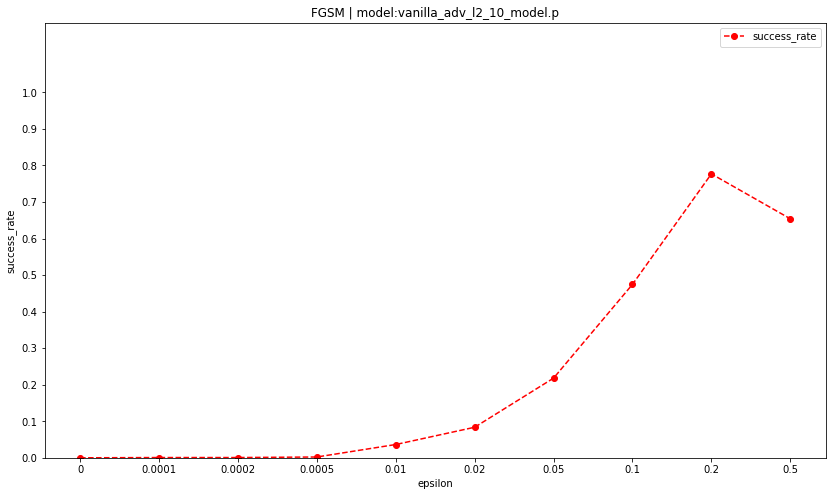

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"

Perform Attack #2/6: FGA L2


100%|██████████| 10/10 [00:44<00:00,  4.45s/it]


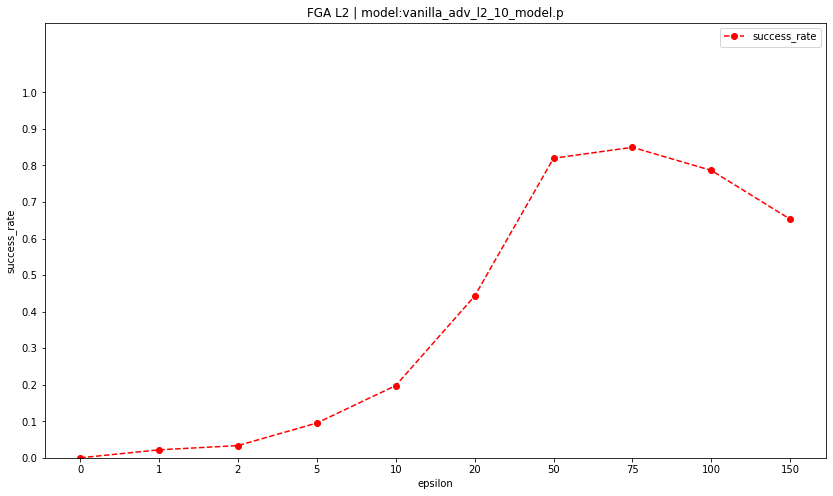

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"

Perform Attack #3/6: FGA L1


100%|██████████| 10/10 [00:44<00:00,  4.47s/it]


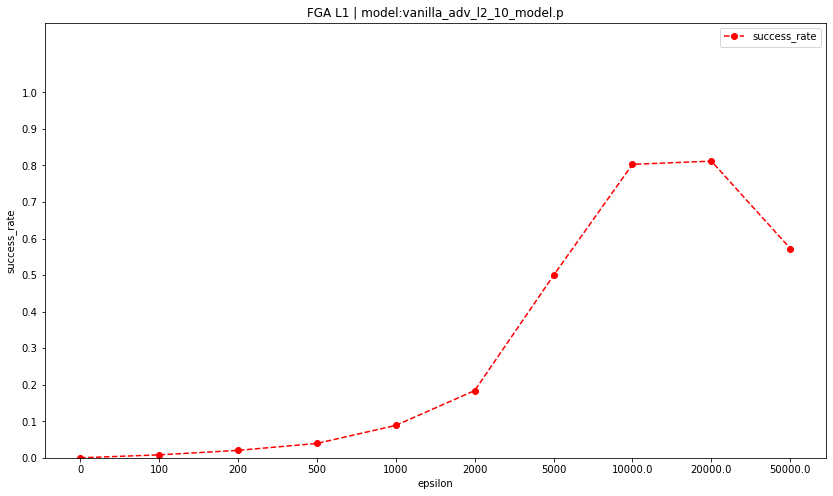

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"

Perform Attack #4/6: Volume


100%|██████████| 10/10 [00:44<00:00,  4.49s/it]


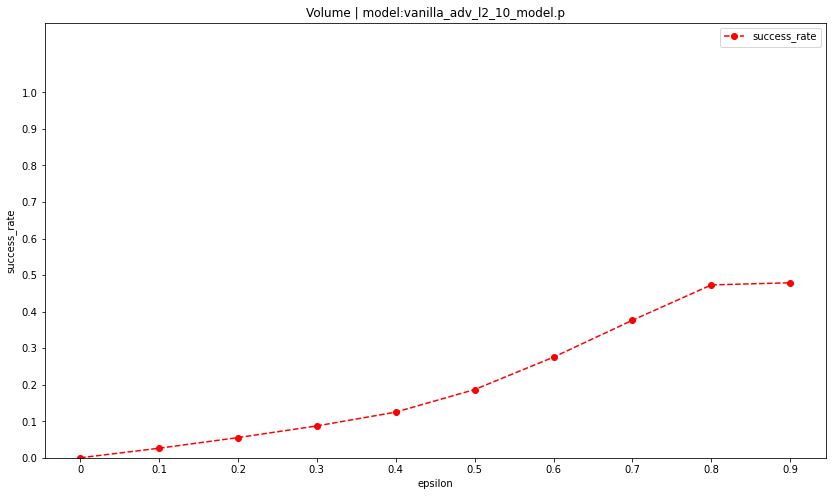

  0%|          | 0/4 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"

Perform Attack #5/6: Pitch Attack


100%|██████████| 4/4 [03:46<00:00, 56.63s/it]


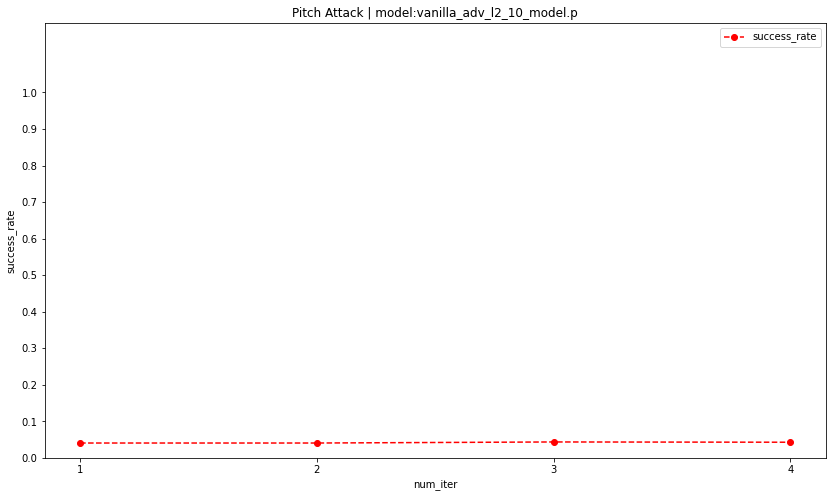

  0%|          | 0/4 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"

Perform Attack #6/6: Time Stretch Attack


100%|██████████| 4/4 [00:25<00:00,  6.35s/it]


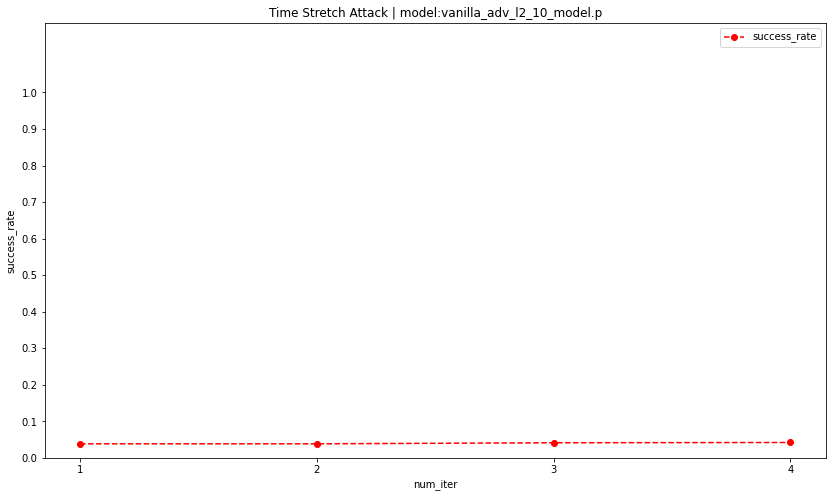

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0008_Evaluation_Part_1/backup.pickle"


In [15]:
experiment = load_experiment(exp_folder = "0008_Evaluation_Part_1")
experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/vanilla_model.p", M5PLModule)# 20 epochs normal training
experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/vanilla_adv_linf_1e-1_model.p", M5PLModule) #20 epochs adv training with l_inf norm, eps = 0.1
experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/vanilla_adv_l2_10_model.p", M5PLModule)

# Analysis
<h1 style="background-color: #FFFF00">Run to update graphs</h1>



### Show all evaluated models

In [18]:
experiment.show_evaluated_models()

['vanilla_model.p',
 'vanilla_adv_linf_1e-1_model.p',
 'vanilla_adv_l2_10_model.p']

### Which model performs best in each attack?

In [22]:
experiment.show_best_models(metric = "success_rate", best_n=1, limit_eps=6)


Attack = FGSM:
[(0.10537790697674418, 'vanilla_adv_linf_1e-1_model.p')]

Attack = FGA L2:
[(0.7906976744186047, 'vanilla_adv_l2_10_model.p')]

Attack = FGA L1:
[(0.34011627906976744, 'vanilla_adv_l2_10_model.p')]

Attack = Volume:
[(0.2592852137351086, 'vanilla_model.p')]

Attack = Pitch Attack:
[(0.16787790697674418, 'vanilla_adv_l2_10_model.p')]

Attack = Time Stretch Attack:
[(0.16061046511627905, 'vanilla_adv_l2_10_model.p')]


### Compare Models

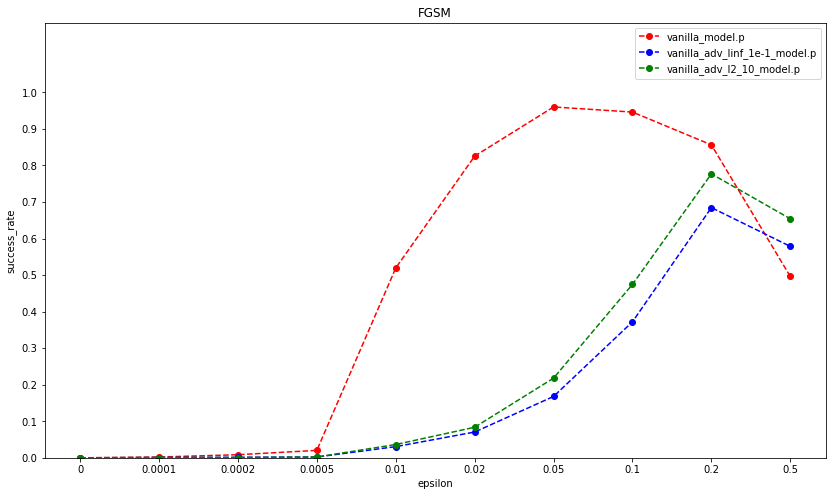

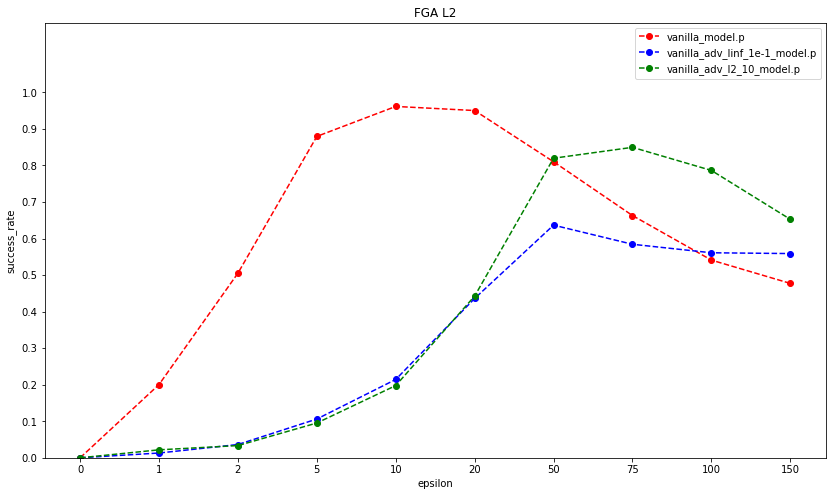

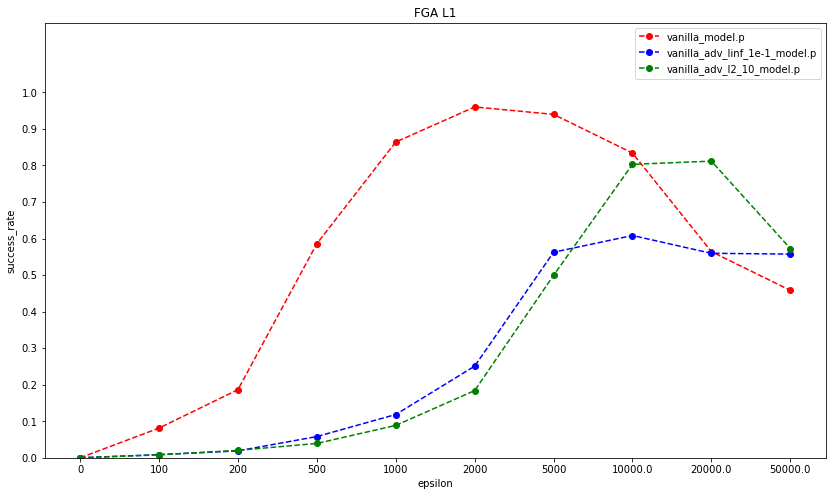

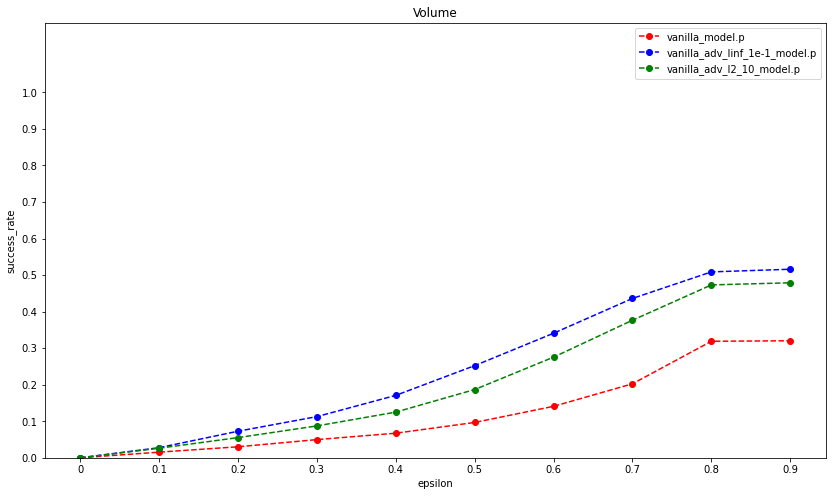

could not find key
could not find key


In [20]:
experiment.compare(config_key = "epsilon", results_key = "success_rate", models=['vanilla_model.p',
                                                                                 'vanilla_adv_linf_1e-1_model.p',
                                                                                 'vanilla_adv_l2_10_model.p'])

# Conclusion

The **M5 Model** is very prone to the first order gradient based attacks, with a peak success rate of ~95% in all attacks. However, adversarial training brings clear improvements.